In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("hf://datasets/drossi/EDA_on_IMDB_Movies_Dataset/imdb_top_1000.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [10]:
df = df.drop('Overview',axis=1)

In [11]:
df.head()

Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110   
1   Marlon Brando       Al Pacino     James Caan    Diane Keaton      1620367   
2  Christian Bale    Heath Ledger  Aaron Eckhart   Michael Caine      2303232   
3       Al Pacino  Robert De Niro  Robert Duvall    Diane Keaton      1129952   
4     Henry Fonda     Lee J. Cobb  Martin Balsam    John Fiedler       689845   

         Gross  
0   28,341,469  
1  134,966,411  
2  534,858,444  
3   57,300,000  
4    4,360,000

In [16]:
df.describe()

IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [13]:
all_genres = df['Genre'].explode().value_counts()

In [14]:
all_genres

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

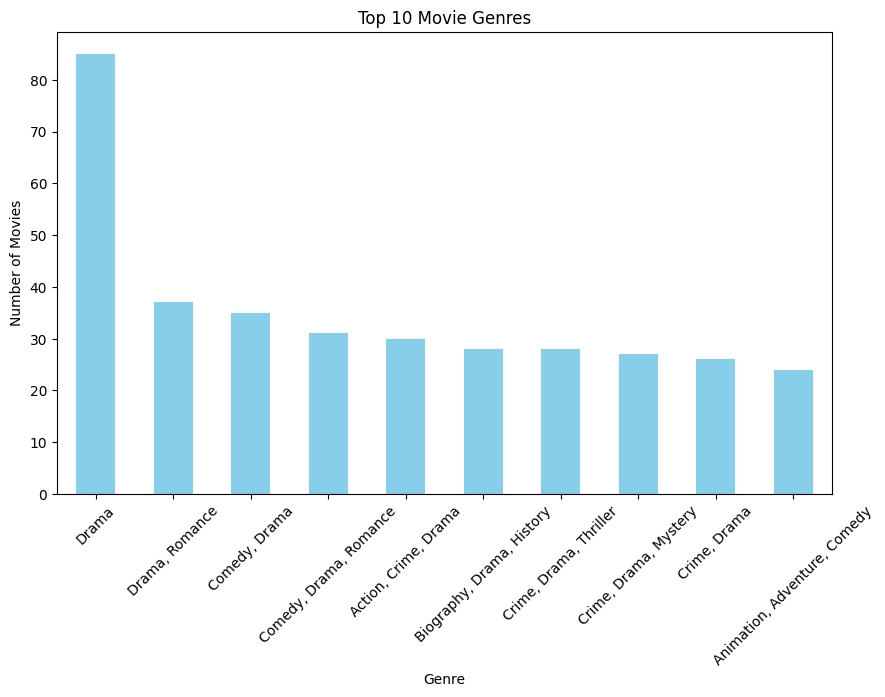

In [23]:
plt.figure(figsize=(10, 6))
top_genres = all_genres.head(10)
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [20]:
average_rating_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean()
average_rating_by_year

Released_Year
1920    8.100000
1921    8.300000
1922    7.900000
1924    8.200000
1925    8.100000
          ...   
2017    7.890909
2018    7.994737
2019    7.995652
2020    8.133333
PG      7.600000
Name: IMDB_Rating, Length: 100, dtype: float64

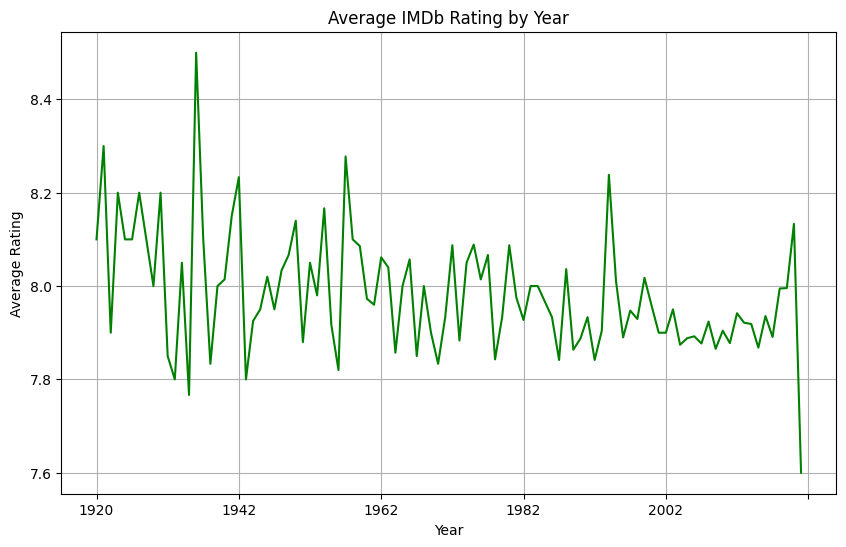

In [24]:
plt.figure(figsize=(10, 6))
average_rating_by_year.plot(kind='line', color='green')
plt.title('Average IMDb Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [28]:
df.head()

Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  Meta_score              Director  \
0                 Drama          9.3        80.0        Frank Darabont   
1          Crime, Drama          9.2       100.0  Francis Ford Coppola   
2  Action, Crime, Drama          9.0        84.0     Christopher Nolan   
3          Crime, Drama          9.0        90.0  Francis Ford Coppola   
4          Crime, Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110   
1   Marlon Brando       Al Pacino     James Caan    Diane Keaton      1620367   
2  Christian Bale    Heath Ledger  Aaron Eckhart   Michael Caine      2303232   
3       Al Pacino  Robert De Niro  Robert Duvall    Diane Keaton      1129952   
4     Henry Fonda     Lee J. Cobb  Martin Balsam    John Fiedler       689845   

         Gross  
0   28,341,469  
1  134,966,411  
2  534,858,444  
3   57,300,000  
4    4,360,000

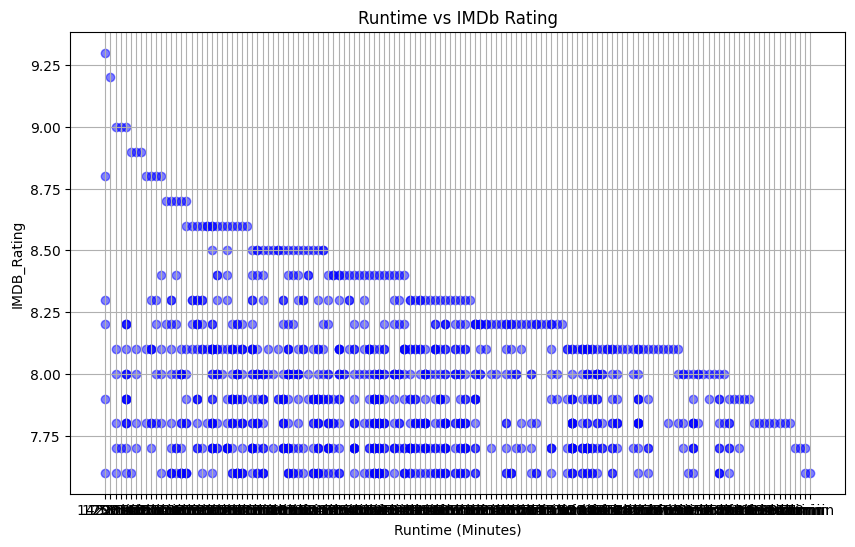

In [29]:
# Scatter plot to analyze the correlation between runtime and average rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['IMDB_Rating'], alpha=0.5, color='blue')
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDB_Rating')
plt.grid(True)
plt.show()


In [31]:
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)  # Remove " min"
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')  # Convert to numeric, coercing errors to NaN

mean_runtime = np.mean(df['Runtime'])
median_runtime = np.median(df['Runtime'])

print(f'Mean Runtime: {mean_runtime} minutes')
print(f'Median Runtime: {median_runtime} minutes')

Mean Runtime: 122.891 minutes
Median Runtime: 119.0 minutes


In [32]:
# Use Numpy to calculate statistics for ratings
mean_rating = np.mean(df['IMDB_Rating'])
median_rating = np.median(df['IMDB_Rating'])
rating_std = np.std(df['IMDB_Rating'])

print(f'Mean Rating: {mean_rating}')
print(f'Median Rating: {median_rating}')
print(f'Standard Deviation of Rating: {rating_std}')


Mean Rating: 7.949299999999999
Median Rating: 7.9
Standard Deviation of Rating: 0.27535342743463326
